Hyperparameter Tuning using Bayesian Optmization


Bayesian optimization uses a probabilistic model to predict the performance of different hyperparameter configurations. It then selects configurations that are more likely to lead to improved results, making it an efficient and effective technique.

In [1]:
#install dependencies
!pip install scikit-optimize optuna



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#import the necessary libraries and the dataset from sklearn.dataset
import numpy as np
import pandas as pd
import time
import optuna
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits #the dataset 
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from skopt.space import Integer,Categorical

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#STEP1 : load the dataset
data_set = load_digits()
X, y = data_set.data, data_set.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Random forest classifier is an  ensemble learning method  used here for multiclass classification(digit recognition)

In [ ]:
rf_model = RandomForestClassifier(random_state=42) #defining the model


Grid search

In [5]:
# peform hyperparameter tuning with grid search
params = {
    'n_estimators': [50, 100,150], # number of decision trees in the Random Forest.
    'max_depth': [10, 15, None],   #max depth of each tree
    'min_samples_split': [2, 4,8]  #min samples to split a node.
}
start_time = time.time()

grid_search = GridSearchCV(rf_model, params, cv=5, n_jobs=-1) #cv stands for cross validation
grid_search.fit(X_train, y_train)
grid_best_params = grid_search.best_params_
grid_best_acc = accuracy_score(y_test, grid_search.best_estimator_.predict(X_test))

grid_time = time.time()-start_time

print("Grid Search Best Params:", grid_best_params)
print("Grid Search Accuracy:", grid_best_acc)
print("Grid Search Time:", grid_time)

Grid Search Best Params: {'max_depth': 15, 'min_samples_split': 4, 'n_estimators': 150}
Grid Search Accuracy: 0.975925925925926
Grid Search Time: 27.030702114105225


Random Search : randomly selects a subset of hyperparameter combinations instead of searching exhaustively, therefore it is faster than grid search.

In [ ]:
#now random search

start_time = time.time()
random_search = RandomizedSearchCV(rf_model, params, n_iter=15, cv=5, n_jobs=-1, random_state=42) 
random_search.fit(X_train, y_train)
random_best_params = random_search.best_params_
random_best_acc = accuracy_score(y_test, random_search.best_estimator_.predict(X_test))

random_time = time.time()-start_time

print("Random Search Best Params:", random_best_params)
print("Random Search Accuracy:", random_best_acc)
print("Random Search Time:", random_time)


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Random Search Best Params: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 15}
Random Search Accuracy: 0.9740740740740741
Random Search Time: 12.706152200698853


Bayesian Optimisation : uses probabilistic model

In [8]:
#bayesian optimisation
start_time = time.time()
bayesian_search = BayesSearchCV(rf_model, params, n_iter=15, n_points=5, cv=5, n_jobs=-1, random_state=42)
bayesian_search.fit(X_train, y_train)
bayesian_best_params = bayesian_search.best_params_
bayesian_best_acc = accuracy_score(y_test, bayesian_search.best_estimator_.predict(X_test))
bayes_time = time.time()-start_time

print("Bayesian Search Best Params:", bayesian_best_params)
print("Bayesian Search Accuracy:", bayesian_best_acc)
print("Bayesian Search Time:", bayes_time)


Bayesian Search Best Params: OrderedDict({'max_depth': None, 'min_samples_split': 4, 'n_estimators': 150})
Bayesian Search Accuracy: 0.9740740740740741
Bayesian Search Time: 15.264972925186157


Randomised search is faster than grid search as it samples a subset of parameters.

In [9]:
#comparing the results
results = {
    "Grid Search": (grid_best_acc, grid_time),
    "Random Search": (random_best_acc, random_time),
    "Bayesian Optimization": (bayesian_best_acc, bayes_time)
}

print("\nComparison of Methods:")
print(f"{'Method':<25} {'Accuracy':<10} {'Time (s)'}")
print("-" * 50)
for method, (acc, time) in results.items():
    print(f"{method:<25} {acc:.4f}      {time:.2f}")



Comparison of Methods:
Method                    Accuracy   Time (s)
--------------------------------------------------
Grid Search               0.9759      27.03
Random Search             0.9741      12.71
Bayesian Optimization     0.9741      15.26


Now we will visualize the comparisons drawn between the methods.

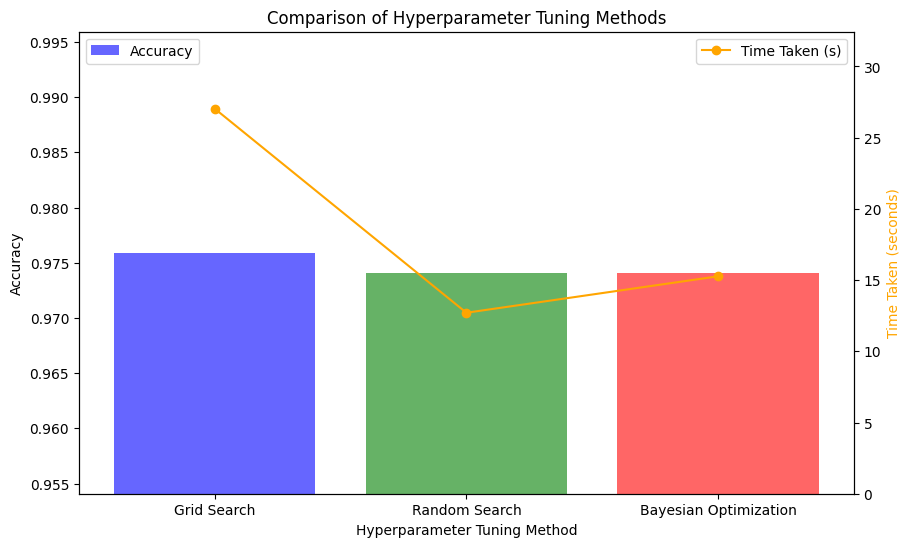

In [ ]:
import matplotlib.pyplot as plt  #library imported for plotting graph.
import numpy as np
results = {
    "Grid Search": grid_best_acc,
    "Random Search": random_best_acc,
    "Bayesian Optimization": bayesian_best_acc
}


time_taken = {
    "Grid Search": grid_time,
    "Random Search": random_time,
    "Bayesian Optimization": bayes_time
}

methods = list(results.keys())
accuracies = list(results.values())
times = list(time_taken.values())

fig, ax1 = plt.subplots(figsize=(10, 6))

#  chart for accuracy
ax1.bar(methods, accuracies, color=['blue', 'green', 'red'], label="Accuracy", alpha=0.6)
ax1.set_xlabel("Hyperparameter Tuning Method")
ax1.set_ylabel("Accuracy", color='black')
ax1.set_title("Comparison of Hyperparameter Tuning Methods")

# second y-axis for time taken
ax2 = ax1.twinx()
ax2.plot(methods, times, color='orange', marker='o', linestyle='-', label="Time Taken (s)")
ax2.set_ylabel("Time Taken (seconds)", color='orange')

ax1.set_ylim([min(accuracies) - 0.02, max(accuracies) + 0.02])
ax2.set_ylim([0, max(times) * 1.2])  # Scaling time axis for better visualization

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()
